# 1. Dependências



In [ ]:
!pip install -q deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.3/128.3 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 37.8 MB/s eta 0:00:00


In [ ]:
from deepface import DeepFace
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image
import time
from scipy.spatial.distance import euclidean

25-08-06 21:42:30 - Directory /root/.deepface has been created
25-08-06 21:42:30 - Directory /root/.deepface/weights has been created


# 2. Funções Auxiliares

In [ ]:
def show_image(img, title="Imagem"):
    if isinstance(img, np.ndarray):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

def draw_fps(img, text):

  fps_text = f"FPS: {text:.2f}"
  cv2.putText(img, fps_text, (10, 30),
              fontFace=cv2.FONT_HERSHEY_SIMPLEX,
              fontScale=1.0,
              color=(0, 0, 0),
              thickness=2,
              lineType=cv2.LINE_AA)

def detect_faces(image, minNeighbors):

  face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=minNeighbors)

  return faces


def draw_rectangle(img, face):
  x, y, w, h = face
  cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)


def crop_face(image, face):
  x, y, w, h = face
  return image[y:y+h, x:x+w]


def generate_embedding(img):
  return DeepFace.represent(img, model_name="Facenet")[0]["embedding"]

# 3. Dados

In [ ]:
# Verifica se já foram baixadas as imagens do drive, baixando-as e descompactando se necessário
! [ ! -d "/content/pessoas.jpg" ] && gdown -O /content/pessoas.jpg "19Q9M_vCwIxyUK4C45F2ZjRZcKUoBUugq"
! [ ! -d "/content/gaucho_com_sosia.jpg" ] && gdown -O /content/gaucho_com_sosia.jpg "15lnDF0n66bRlyAoOLQlc7biHMs4RTDqy"
! [ ! -d "/content/gaucho.jpg" ] && gdown -O /content/gaucho.jpg "1YsRExYJWwn6sEtnqLaWZbRE0YIz10emg"


Downloading...
From: https://drive.google.com/uc?id=19Q9M_vCwIxyUK4C45F2ZjRZcKUoBUugq
To: /content/pessoas.jpg
100% 131k/131k [00:00<00:00, 75.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=15lnDF0n66bRlyAoOLQlc7biHMs4RTDqy
To: /content/gaucho_com_sosia.jpg
100% 62.3k/62.3k [00:00<00:00, 59.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1YsRExYJWwn6sEtnqLaWZbRE0YIz10emg
To: /content/gaucho.jpg
100% 78.5k/78.5k [00:00<00:00, 99.0MB/s]


# 4. Implementações


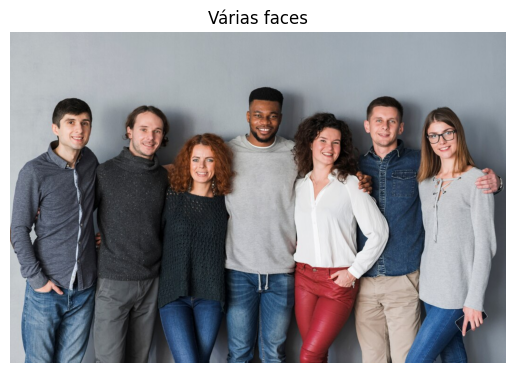

In [ ]:
image = cv2.imread("pessoas.jpg")
show_image(image, "Várias faces")

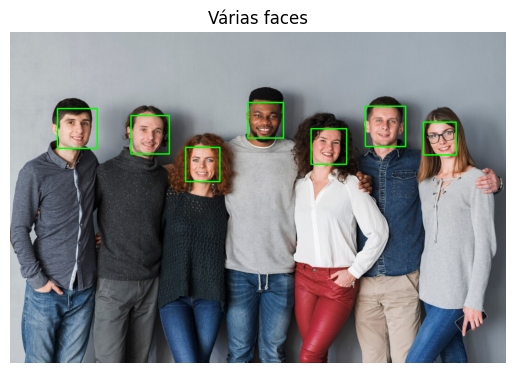

Embedding: shape = (128,)
[0.711747407913208, -0.6821846961975098, 2.0911765098571777, -0.3723200261592865, -0.5437547564506531, -1.4523835182189941, -0.008491162210702896, 0.012104447931051254, -0.6479435563087463, -0.0716962218284607]


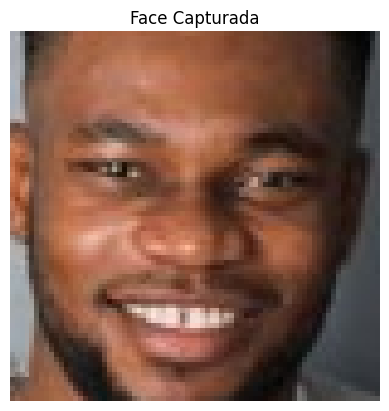

FPS = 0.59


In [ ]:
start = time.time()

faces = detect_faces(image, 20)

image_haar = image.copy()
for (x, y, w, h) in faces:
    draw_rectangle(image_haar, (x, y, w, h))

show_image(image_haar, "Várias faces")

input = 0

input_image = crop_face(image, faces[input])

input_embedding = generate_embedding(input_image)

fps = 1.0 / (time.time() - start)

print(f"Embedding: shape = {np.array(input_embedding).shape}")
print(input_embedding[:10])  # primeiros 10 valores

show_image(input_image, "Face Capturada")

print(f"FPS = {fps:.2f}")

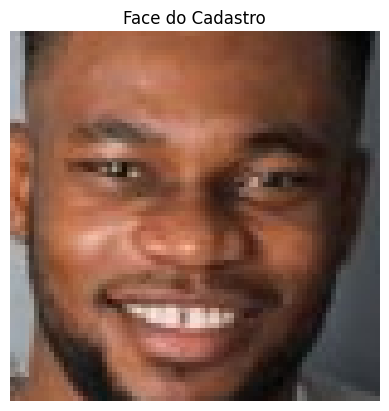

In [ ]:
target = 0

target_image = crop_face(image, faces[target])
show_image(target_image, "Face do Cadastro")

target_embedding = generate_embedding(target_image)

In [ ]:
vec1 = np.array(input_embedding)
vec2 = np.array(target_embedding)

dist_euclid = euclidean(vec1, vec2)

print(f"Distância Euclidiana: {dist_euclid:.4f}")

Distância Euclidiana: 16.9531


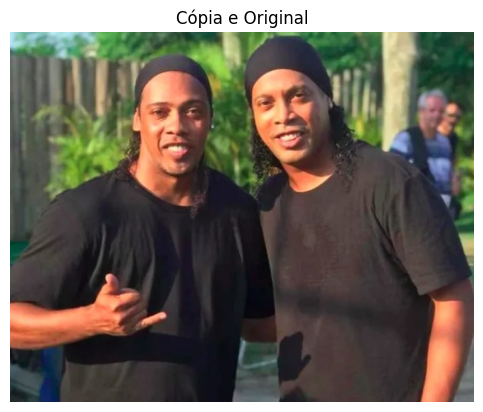

In [ ]:
test_image = cv2.imread("gaucho_com_sosia.jpg")
show_image(test_image, "Cópia e Original")

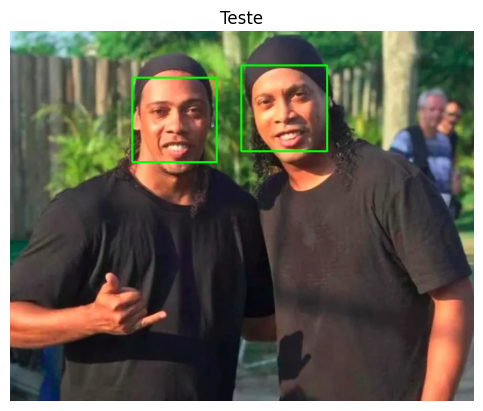

In [ ]:
faces = detect_faces(test_image, 20)

image_haar = test_image.copy()
for (x, y, w, h) in faces:
  draw_rectangle(image_haar, (x, y, w, h))

show_image(image_haar, "Teste")

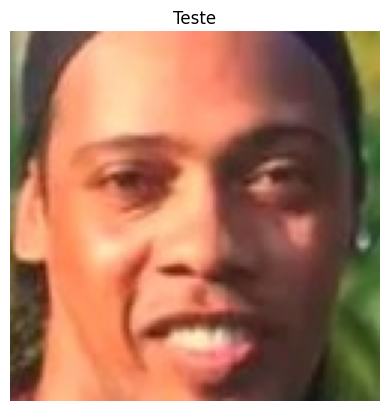

In [ ]:
fake = 1

fake_image = crop_face(test_image, faces[fake])
fake_embedding = generate_embedding(fake_image)

show_image(fake_image, "Teste")


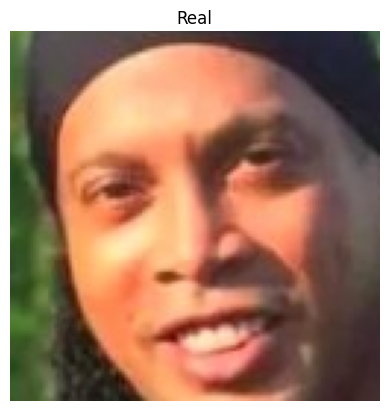

In [ ]:
actual = 0

actual_image = crop_face(test_image, faces[actual])
actual_embedding = generate_embedding(actual_image)

show_image(actual_image, "Real")

In [ ]:
vec1 = np.array(fake_embedding)
vec2 = np.array(actual_embedding)

dist_euclid = euclidean(vec1, vec2)

print(f"Distância Euclidiana: {dist_euclid:.4f}")

Distância Euclidiana: 12.6475


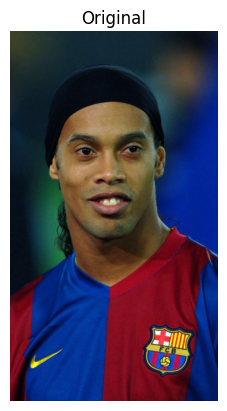

In [ ]:
val_image = cv2.imread("gaucho.jpg")
show_image(val_image, "Original")

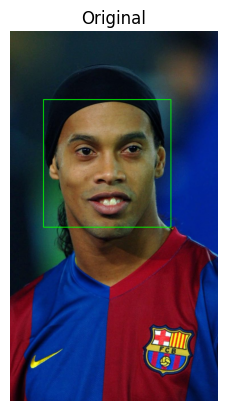

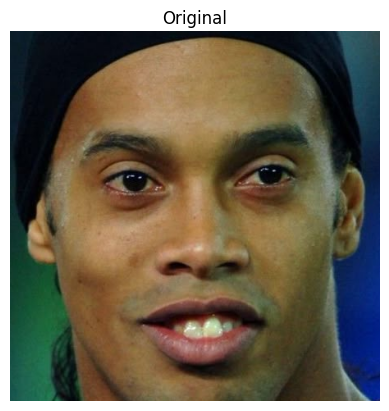

In [ ]:
faces = detect_faces(val_image, 20)

image_haar = val_image.copy()
for (x, y, w, h) in faces:
    cv2.rectangle(image_haar, (x, y), (x + w, y + h), (0, 255, 0), 2)

show_image(image_haar, "Original")

final_image = crop_face(val_image, faces[0])
final_embedding = generate_embedding(val_image)

show_image(final_image, "Original")

In [ ]:
vec1 = np.array(actual_embedding)
vec2 = np.array(final_embedding)

dist_euclid = euclidean(vec1, vec2)

print(f"Distância Euclidiana: {dist_euclid:.4f}")

Distância Euclidiana: 10.1768
